# 1. Project Introduction

Financial fraud is a critical problem for banks, fintech companies, and e-commerce platforms. Fraudulent transactions not only lead to significant financial loss but also damage customer trust and regulatory compliance. Detecting fraud is challenging because fraudsters constantly evolve their tactics to bypass security measures.

This project leverages a synthetic dataset of 5 million financial transactions, designed to reflect real-world behavior. Using this dataset, we aim to analyze transaction patterns, detect anomalies, identify risk factors, and provide actionable insights for reducing fraud.

The analysis will use data cleaning, exploratory data analysis (EDA), visualization, statistical testing, and predictive modeling techniques.

# 2. Business Problem

Core Problem: Fraudulent transactions are increasing in volume and complexity, making it difficult for financial institutions to detect and prevent them in real-time.

Business Implications:

Financial losses due to fraud.

Increased operational costs for fraud investigation.

Damage to brand reputation and customer trust.

Regulatory penalties for failing to report or prevent fraud.

Goal:

Identify patterns of fraudulent transactions.

Understand which features (e.g., location, device, transaction type) are most associated with fraud.

Build actionable insights for fraud detection rules or predictive models.

# 3. Research Objectives

Explore and understand transaction patterns and behavior.

Identify key indicators of fraudulent activity.

Detect anomalies in transaction behavior.

Evaluate which transaction channels or devices are most vulnerable to fraud.

Provide actionable insights to reduce financial losses and operational risk.


🧾 Transaction Details

These describe what happened in the transaction.
| Feature              | Simple Meaning                                                                    |
| -------------------- | --------------------------------------------------------------------------------- |
| **ID**               | A unique number given to each transaction, like a serial number.                  |
| **Timestamp**        | The exact date and time when the transaction happened.                            |
| **Sender Account**   | The account that sent the money.                                                  |
| **Receiver Account** | The account that received the money.                                              |
| **Amount**           | The total money value involved in the transaction.                                |
| **Type**             | The kind of transaction — for example, deposit, withdrawal, transfer, or payment. |

⚙️ Behavioral Features

These describe how the user behaves when doing transactions. They help detect unusual activity.
| Feature                         | Simple Meaning                                                                                                                                                     |
| ------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Time Since Last Transaction** | How much time passed between this and the user’s previous transaction. (If someone usually transacts once a day but suddenly does 10 in an hour, it’s suspicious.) |
| **Spending Deviation Score**    | A score showing how different this spending is from the person’s normal spending. (High score = unusual spending.)                                                 |
| **Velocity Score**              | Shows how fast multiple transactions are happening. (Very high velocity can mean fraud bots or stolen accounts.)                                                   |
| **Geo-Anomaly Score**           | Measures if the location of this transaction is unusual for the user. (Example: User usually pays in India but suddenly transacts from Russia — it’s an anomaly.)  |

🌍 Metadata

Extra information about how and from where the transaction happened.

| Feature             | Simple Meaning                                                                                                 |
| ------------------- | -------------------------------------------------------------------------------------------------------------- |
| **Location**        | The place (city, country, etc.) where the transaction occurred.                                                |
| **Device Used**     | The device used for the transaction — like a phone, laptop, or ATM.                                            |
| **Payment Channel** | How the payment was made — like mobile app, online banking, credit card, or ATM.                               |
| **IP Address**      | The internet address of the device used. Helps track if a login came from an unknown place.                    |
| **Device Hash**     | A coded ID that represents a specific device (used to detect multiple suspicious accounts on the same device). |

🚨 Fraud Indicators

These tell whether the transaction was legitimate or fraudulent.
| Feature           | Simple Meaning                                                                                                               |
| ----------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **is_fraud**      | 1 if the transaction is fraud, 0 if it’s normal.                                                                             |
| **Type of Fraud** | The kind of fraud — e.g., **money laundering** (hiding illegal money), **account takeover** (someone stole login info), etc. |


In [1]:
import numpy as np
import pandas as pd
import  sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# creating database connection
conn = sqlite3.connect("fraud_detection.db")
tables = pd.read_sql_query("""SELECT name FROM sqlite_master WHERE type = 'table'""",conn)
tables


,name
0,fraud_data


In [3]:
df = pd.read_sql_query("""select * from fraud_data""",conn)


In [4]:
df.columns

Index(['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'amount', 'transaction_type', 'merchant_category', 'location',
       'device_used', 'is_fraud', 'fraud_type', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash'],
      dtype='object')

# Data Cleaning and Assesement

Data Accessing:
1) Dirty dat (data with quality issues)
  - duplicated data 
  - missing data
  - currupt data
  - inaccurate data

  Issues:
  
     - The timestamp column has an incorrect data type.
     - time_since_last_transaction and fraud type has null values

2) Messy dat (data with tidiness issues)
  - each variable forms columns 
  - each observation forms a row
  - each obeservational unit form a new table



In [4]:
df.sample(5)

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
222642,T2702782,2023-11-19T03:20:30.708876,ACC773809,ACC955552,127.07,withdrawal,travel,Berlin,atm,0,None,2124.976817,0.25,10,0.48,UPI,156.246.63.113,D3785161
267362,T2913581,2023-05-10T02:21:57.316738,ACC693793,ACC886260,880.15,deposit,entertainment,New York,web,0,None,-5395.856179,0.72,16,0.73,UPI,185.240.49.45,D4380888
304131,T3859930,2023-03-12T19:39:59.065465,ACC273405,ACC553545,107.74,payment,retail,Sydney,web,0,None,1365.382935,0.12,5,0.35,ACH,80.241.60.252,D4702498
372126,T1170791,2023-12-29T13:42:33.462517,ACC317495,ACC900368,21.82,transfer,grocery,London,pos,0,None,4212.929345,-1.95,16,0.35,ACH,226.131.111.68,D1689959
219503,T1217226,2023-09-18T23:10:01.162343,ACC997845,ACC266359,1135.47,deposit,online,Sydney,atm,0,None,-313.799100,1.51,8,0.56,card,47.223.195.228,D4341668


In [5]:
# Basic inspection
print(df.shape)       # Check number of rows and columns


(500000, 18)


In [6]:
print(df.info())      # Data types, null counts # Summary statistics for numeric columns --- IGNORE ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   transaction_id               500000 non-null  object 
 1   timestamp                    500000 non-null  object 
 2   sender_account               500000 non-null  object 
 3   receiver_account             500000 non-null  object 
 4   amount                       500000 non-null  float64
 5   transaction_type             500000 non-null  object 
 6   merchant_category            500000 non-null  object 
 7   location                     500000 non-null  object 
 8   device_used                  500000 non-null  object 
 9   is_fraud                     500000 non-null  int64  
 10  fraud_type                   17991 non-null   object 
 11  time_since_last_transaction  410613 non-null  float64
 12  spending_deviation_score     500000 non-null  float64
 13 

In [7]:
df.describe() # Summary statistics for numeric columns --- IGNORE ---

,amount,is_fraud,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,500000.000000,500000.000000,410613.000000,500000.000000,500000.000000,500000.000000
mean,359.257150,0.035982,-1.479693,-0.001068,10.514462,0.500184
std,469.424742,0.186245,3575.299960,1.002032,5.766023,0.288700
min,0.010000,0.000000,-8744.892827,-4.600000,1.000000,0.000000
25%,26.600000,0.000000,-2567.693992,-0.680000,6.000000,0.250000
50%,139.700000,0.000000,1.000393,0.000000,11.000000,0.500000
75%,504.300000,0.000000,2556.863023,0.680000,16.000000,0.750000
max,3228.860000,1.000000,8722.497404,4.450000,20.000000,1.000000


In [8]:
# finding null values and their percentage
df.isnull().sum()

transaction_id                      0
timestamp                           0
sender_account                      0
receiver_account                    0
amount                              0
transaction_type                    0
merchant_category                   0
location                            0
device_used                         0
is_fraud                            0
fraud_type                     482009
time_since_last_transaction     89387
spending_deviation_score            0
velocity_score                      0
geo_anomaly_score                   0
payment_channel                     0
ip_address                          0
device_hash                         0
dtype: int64

In [9]:
(df.isnull().sum()/df.shape[0])*100

transaction_id                  0.0000
timestamp                       0.0000
sender_account                  0.0000
receiver_account                0.0000
amount                          0.0000
transaction_type                0.0000
merchant_category               0.0000
location                        0.0000
device_used                     0.0000
is_fraud                        0.0000
fraud_type                     96.4018
time_since_last_transaction    17.8774
spending_deviation_score        0.0000
velocity_score                  0.0000
geo_anomaly_score               0.0000
payment_channel                 0.0000
ip_address                      0.0000
device_hash                     0.0000
dtype: float64

obbservation
- fraud type and time_since_last_transaction has null values
- fraud type has 96 % null values 
- time_since_last_transaction has 17 % null values


In [11]:
# Drop fraud_type columns
# df.drop(columns="fraud_type",axis=1,inplace= True)

In [13]:
categorical_data = df.select_dtypes(include="object").columns
categorical_data = ['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'transaction_type', 'merchant_category', 'location', 'device_used',
       'fraud_type', 'payment_channel', 'ip_address', 'device_hash']

In [14]:
# checking unique data in each categorical column
def checking_unique():
    for i in categorical_data:
       print(df[i].unique())
checking_unique()       

['T3677888' 'T5093932' 'T4194900' ... 'T1123333' 'T4071941' 'T538100']
['2023-04-09T20:06:09.254118' '2023-07-16T05:26:15.162082'
 '2023-12-13T19:04:47.539751' ... '2023-11-10T22:45:02.933053'
 '2023-12-13T05:26:45.043826' '2023-06-19T16:53:02.000210']
['ACC529887' 'ACC872160' 'ACC403211' ... 'ACC866012' 'ACC770701'
 'ACC418159']
['ACC346873' 'ACC767192' 'ACC536309' ... 'ACC986799' 'ACC254855'
 'ACC734069']
['transfer' 'payment' 'deposit' 'withdrawal']
['online' 'other' 'travel' 'restaurant' 'grocery' 'utilities'
 'entertainment' 'retail']
['London' 'Tokyo' 'Toronto' 'Berlin' 'Dubai' 'New York' 'Singapore'
 'Sydney']
['pos' 'mobile' 'web' 'atm']
[None 'card_not_present']
['ACH' 'UPI' 'card' 'wire_transfer']
['143.188.216.101' '147.167.236.198' '83.44.197.232' ... '236.68.76.51'
 '27.251.201.226' '122.195.5.100']
['D1912159' 'D5847071' 'D2907026' ... 'D1867777' 'D9979433' 'D6559722']


In [15]:
# converting timestamp datatypes into correct data formate
df["timestamp"] = pd.to_datetime(df["timestamp"],errors= "coerce")

In [16]:
df.sample(5)

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
455070,T4083396,2023-10-22 17:06:21.664415,ACC525199,ACC370166,269.71,withdrawal,retail,Toronto,web,0,None,6820.196630,0.09,14,0.11,card,117.28.160.33,D2123936
142323,T4081684,2023-06-28 07:09:27.641696,ACC530367,ACC264096,138.72,withdrawal,restaurant,Dubai,mobile,0,None,2612.892735,-1.11,18,0.94,UPI,21.127.251.216,D9311908
49709,T2317825,2023-03-10 04:46:55.992594,ACC137727,ACC944426,707.39,deposit,grocery,London,atm,0,None,1280.608693,1.05,16,0.51,UPI,214.9.216.131,D6560699
100659,T4461242,2023-08-23 16:23:58.114953,ACC357870,ACC628889,692.05,withdrawal,grocery,London,atm,0,None,1017.743345,-0.22,5,0.37,UPI,26.143.240.41,D6893729
419823,T1239386,2023-01-14 11:25:13.792682,ACC572382,ACC761205,46.87,transfer,other,Singapore,atm,0,None,-7388.193885,0.47,11,0.97,ACH,245.121.53.78,D9708394


In [48]:
df.columns

Index(['transaction_id', 'timestamp', 'sender_account', 'receiver_account',
       'amount', 'transaction_type', 'merchant_category', 'location',
       'device_used', 'is_fraud', 'fraud_type', 'time_since_last_transaction',
       'spending_deviation_score', 'velocity_score', 'geo_anomaly_score',
       'payment_channel', 'ip_address', 'device_hash', 'day', 'month',
       'month_name', 'hour', 'day_of_week', 'outlier_iqr', 'outlier_extreme'],
      dtype='object')

# Exploratory Data Analysis


Fraud transactions: 17991 (3.60%)
Legitimate transactions: 482009 (96.40%)


C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_31672\273747528.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='is_fraud',data=df,palette='coolwarm')


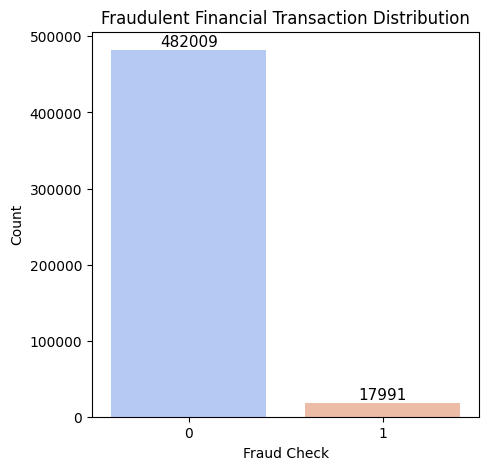

In [17]:
# fraud and legal_transactions distribution
fraud_trans_count = df["is_fraud"] == True
legal_trans_count = df["is_fraud"] == False
print(f"Fraud transactions: {fraud_trans_count.sum()} ({fraud_trans_count.sum()*100/df.shape[0]:.2f}%)")
print(f"Legitimate transactions: {legal_trans_count .sum()} ({legal_trans_count .sum()*100/df.shape[0]:.2f}%)")


plt.figure(figsize=(5,5))
ax = sns.countplot(x='is_fraud',data=df,palette='coolwarm')
plt.title("Fraudulent Financial Transaction Distribution")
plt.xlabel("Fraud Check")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize=11, color='black',
                xytext=(0, 6),textcoords='offset points')
plt.show()

In [18]:
df['day'] = df['timestamp'].dt.day
df["month"] = df["timestamp"].dt.month
df['month_name'] = df['timestamp'].dt.month_name()
df["hour"] = df["timestamp"].dt.hour
df["day_of_week"] = df["timestamp"].dt.day_name()

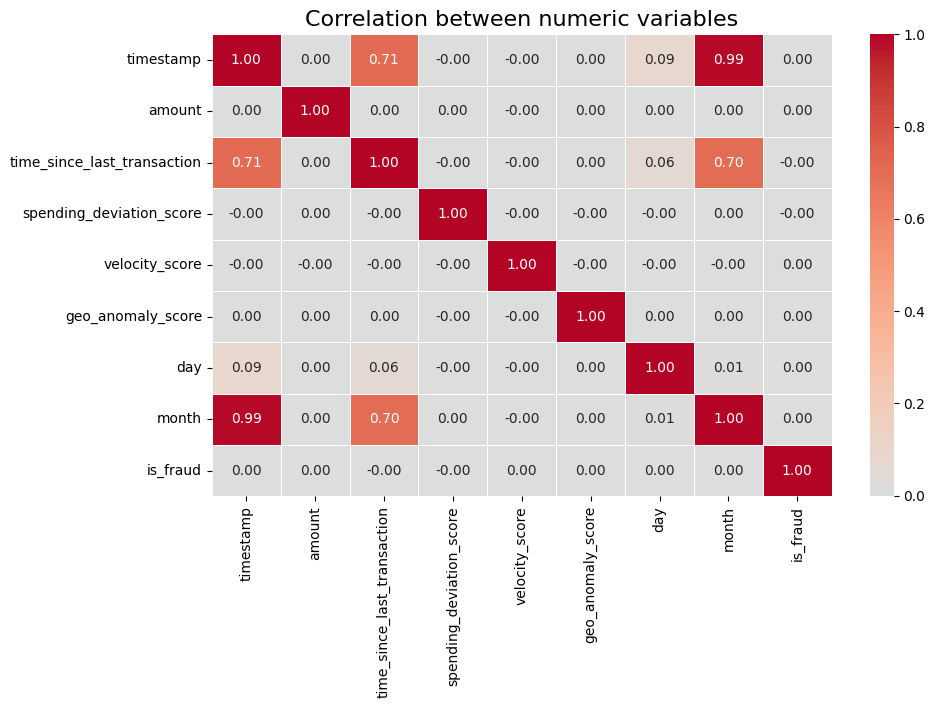

In [19]:
### Correlation for numeric variables
corr_df = df[["timestamp","amount","time_since_last_transaction","spending_deviation_score","velocity_score","geo_anomaly_score","day","month","is_fraud"]]
correlation_matrix = corr_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',center=0,linewidths=0.5,cbar=True,fmt='.2f')
plt.title("Correlation between numeric variables",fontsize=16)
plt.show()

#### Amount

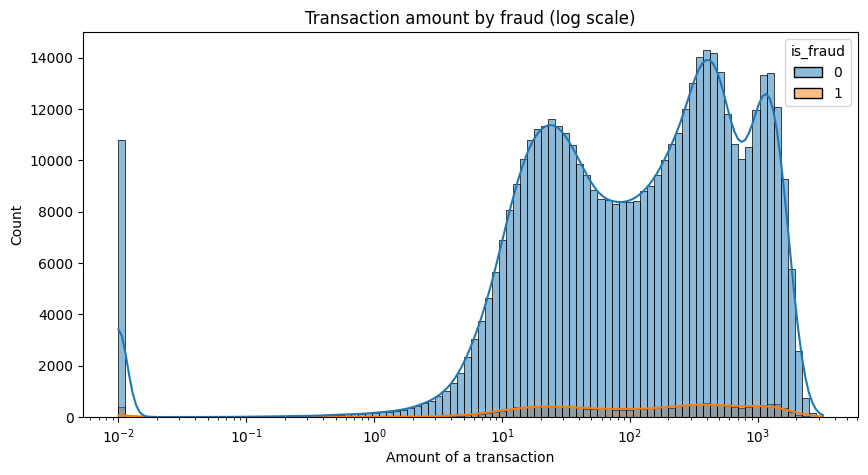

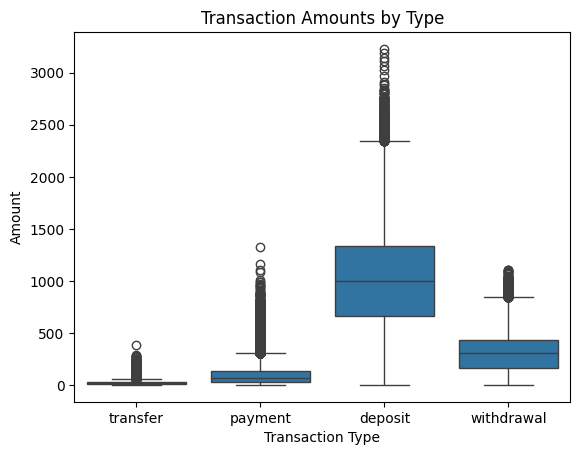

In [20]:

# What is the distribution of transaction amounts?
plt.figure(figsize=(10,5))
sns.histplot(df,x='amount',hue='is_fraud',bins=100,kde=True,log_scale=True)
plt.xlabel('Amount of a transaction')
plt.title("Transaction amount by fraud (log scale)")
plt.show()

# Breakdown by Transaction Type
sns.boxplot(x="transaction_type", y="amount", data=df)
plt.title("Transaction Amounts by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Amount")
plt.show()

Total IQR outliers: 40991
Fraud rate among IQR outliers: 3.73%
Total extreme outliers: 5000
Fraud rate among extreme outliers: 3.60%


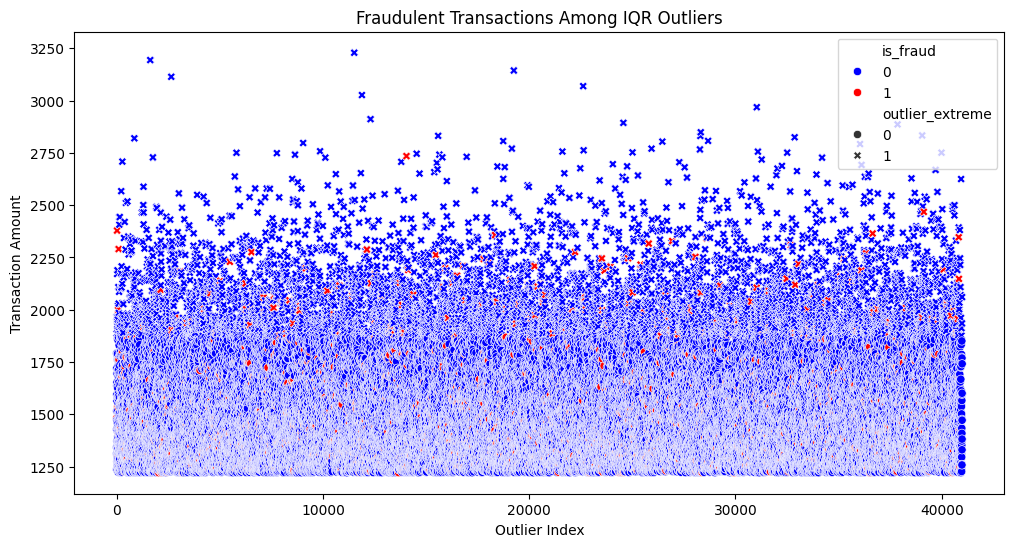

In [21]:

# Identify Unusually High/Low Amounts

q1 = df["amount"].quantile(0.25)
q3 = df["amount"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['outlier_iqr'] = np.where(
    (df['amount'] < lower_bound) | (df['amount'] > upper_bound),
    1, 0
)

# Are high-value transactions more likely to be fraudulent?
top_1_percent = df['amount'].quantile(0.99)
df['outlier_extreme'] = np.where(df['amount'] > top_1_percent, 1, 0)
fraud_outliers_iqr = df[df['outlier_iqr'] == 1]['is_fraud'].sum()
total_outliers_iqr = df['outlier_iqr'].sum()
fraud_rate_outliers_iqr = (fraud_outliers_iqr / total_outliers_iqr) * 100
print(f"Total IQR outliers: {total_outliers_iqr}")
print(f"Fraud rate among IQR outliers: {fraud_rate_outliers_iqr:.2f}%")

# Fraud rate among extreme outliers
fraud_extreme = df[df['outlier_extreme'] == 1]['is_fraud'].sum()
total_extreme = df['outlier_extreme'].sum()
fraud_rate_extreme = (fraud_extreme / total_extreme) * 100
print(f"Total extreme outliers: {total_extreme}")
print(f"Fraud rate among extreme outliers: {fraud_rate_extreme:.2f}%")


# Filter only outliers
outliers_df = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]

# Scatter plot highlighting fraudulent outliers
plt.figure(figsize=(12,6))
sns.scatterplot(
    x=np.arange(len(outliers_df)),  # index for plotting
    y='amount', 
    hue='is_fraud', 
    style='outlier_extreme',  # different markers for fraud/non-fraud
    data=outliers_df,
    palette={0:'blue', 1:'red'},
    markers={0:'o', 1:'X'}
)
plt.title("Fraudulent Transactions Among IQR Outliers")
plt.ylabel("Transaction Amount")
plt.xlabel("Outlier Index")
plt.show()

#### timestamp

In [22]:
# common code for all features
def fraud_txn_data(content):
       day_time_volume = df.groupby(content).agg(total_txn = ("transaction_id",'count'),
                                         fraudulent_tx = ("is_fraud","sum"))
   
       day_time_volume["fraud_rate"] = (day_time_volume["fraudulent_tx"]/day_time_volume["total_txn"])*100
       day_time_volume = day_time_volume.sort_values("fraud_rate",ascending= False).head(10)
       return day_time_volume

def fraud_txn_chart(content):
       plt.figure(figsize=(22,6))
       ax = sns.countplot(data= df,  x= df[content] ,palette= "viridis",hue= "is_fraud")
       plt.title(f"{content} Transaction Fraud Detection")
       plt.xlabel(f"{content}")
       plt.ylabel("Number of Transactions")
       plt.legend()
       for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize=8, color='black',
                xytext=(0, 6),textcoords='offset points')
       plt.show()



In [23]:

# Daily Transaction Fraud Detection
daily_fruad_txn = fraud_txn_data("day")
daily_fruad_txn

,total_txn,fraudulent_tx,fraud_rate
day,,,
21,16426,636,3.871910
31,9632,369,3.830980
22,16276,620,3.809290
10,16473,623,3.781946
17,16662,630,3.781059
8,16551,616,3.721829
27,16588,614,3.701471
2,16399,606,3.695347
26,16257,600,3.690718


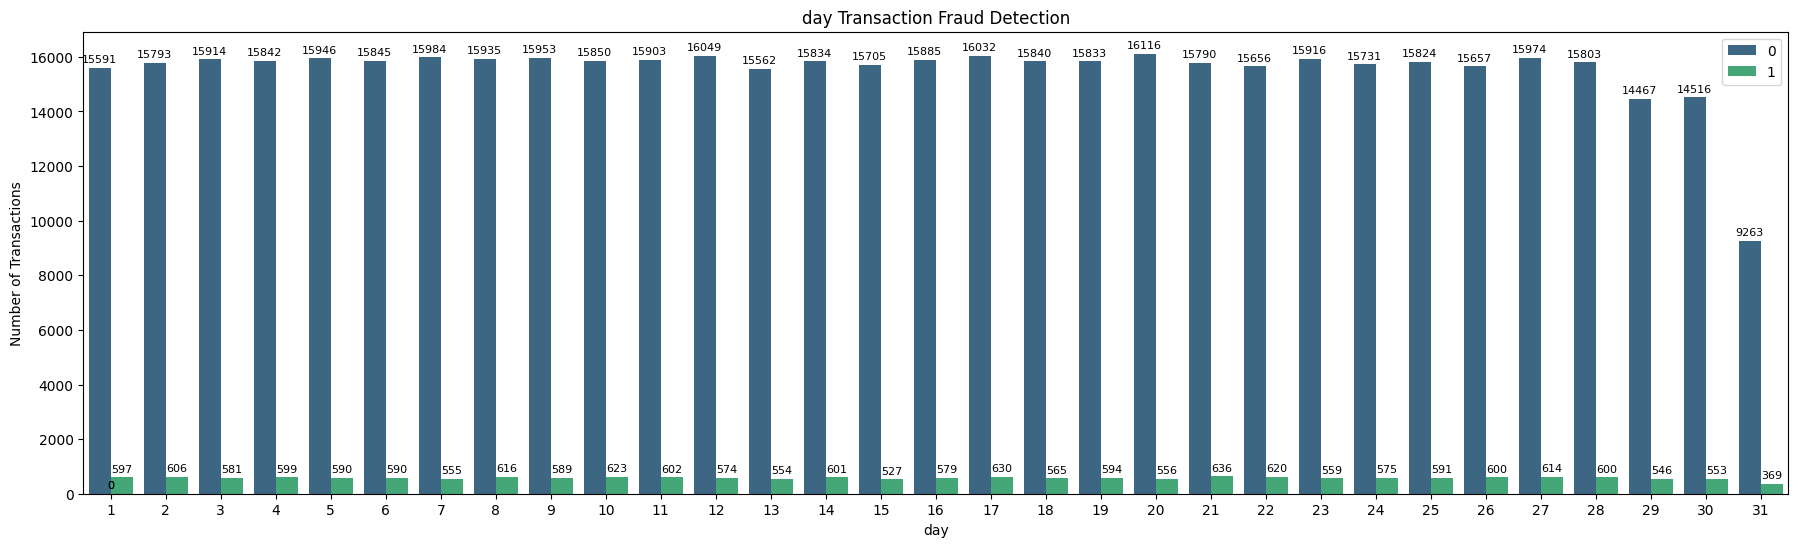

In [24]:
daily_fraud_txn_visual = fraud_txn_chart("day")
daily_fraud_txn_visual

In [25]:
# Monthly Transaction Fraud Detection
monthly_fruad_txn = fraud_txn_data("month_name")
monthly_fruad_txn

,total_txn,fraudulent_tx,fraud_rate
month_name,,,
May,42486,1578,3.714165
March,42461,1549,3.648054
December,42282,1536,3.632752
February,38151,1385,3.630311
November,41116,1487,3.616597
October,42479,1534,3.611196
August,42379,1529,3.607919
June,41201,1481,3.594573
April,41074,1465,3.566733


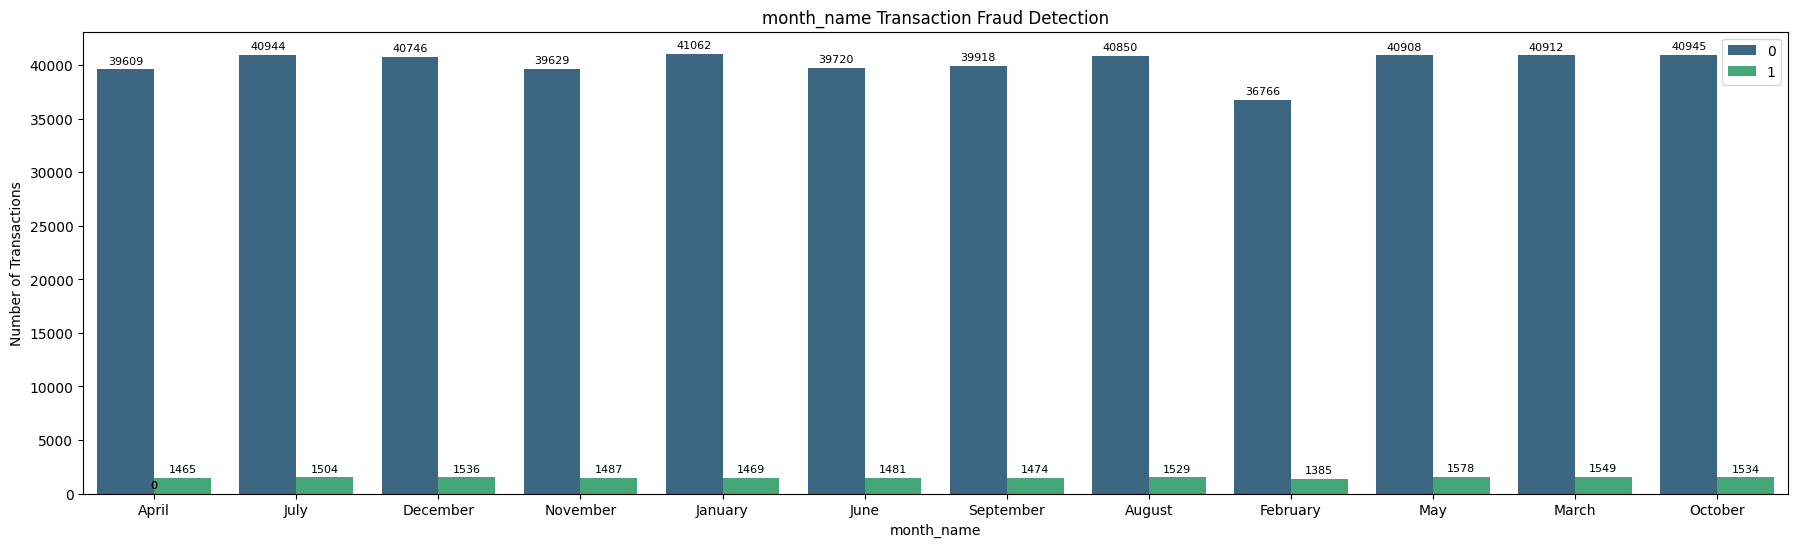

In [26]:
monthly_fraud_txn_visual = fraud_txn_chart("month_name")
monthly_fraud_txn_visual

In [27]:
# weekly Transaction Volume
weekly_fruad_txn = fraud_txn_data("day_of_week")
weekly_fruad_txn

,total_txn,fraudulent_tx,fraud_rate
day_of_week,,,
Sunday,72051,2660,3.691829
Wednesday,71072,2566,3.610423
Tuesday,71375,2572,3.603503
Saturday,71024,2542,3.579072
Friday,71319,2552,3.578289
Thursday,71284,2540,3.563212
Monday,71875,2559,3.560348


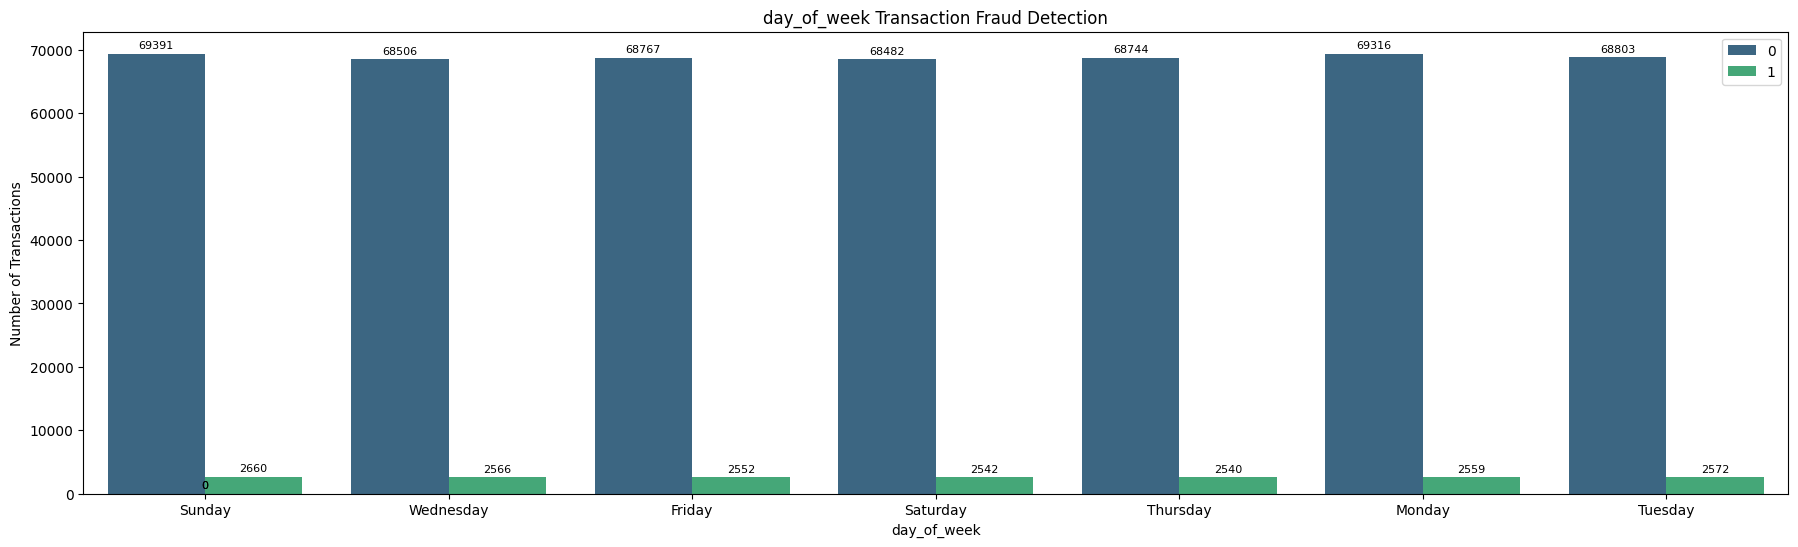

In [28]:
weekly_fraud_txn_visual = fraud_txn_chart("day_of_week")
weekly_fraud_txn_visual


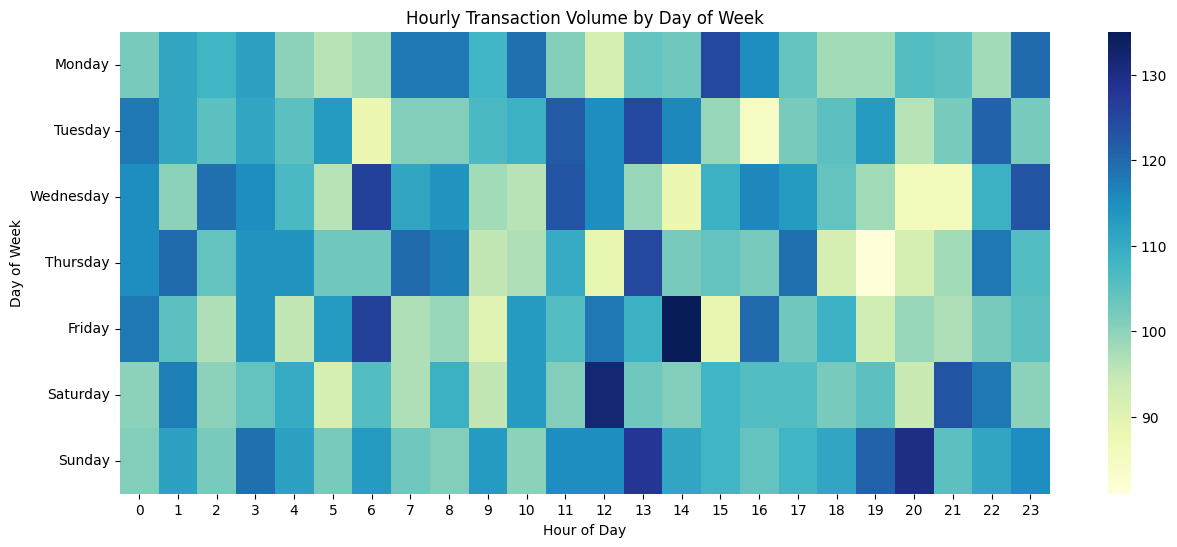

,total_txn,fraudulent_tx,fraud_rate
hour,,,
0,20646,769,3.724692
1,20904,776,3.712208
2,20778,735,3.537395
3,20970,789,3.762518
4,20845,743,3.564404
5,20771,715,3.442299
6,20859,760,3.643511
7,20805,747,3.590483
8,21135,759,3.591199


In [29]:

# Hourly Transaction Volume by Day of Week
hour_week_volume = df.groupby(["day_of_week","hour"]).agg(total_txn = ("transaction_id",'count'),
                                      fraudulent_tx = ("is_fraud","sum")).unstack("hour").reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

hour_volume_fraud= df.groupby(["hour"]).agg(total_txn = ("transaction_id",'count'),
                                      fraudulent_tx = ("is_fraud","sum"))

hour_volume_fraud["fraud_rate"] = (hour_volume_fraud["fraudulent_tx"]/hour_volume_fraud["total_txn"])*100
hour_week_volume_fraud= hour_volume_fraud.sort_values("fraud_rate",ascending= False)
plt.figure(figsize=(15,6))
sns.heatmap(hour_week_volume['fraudulent_tx'], cmap="YlGnBu", fmt="d")
plt.title("Hourly Transaction Volume by Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()
hour_volume_fraud.head(10)

###  Transaction Types

In [30]:
# Calculate Fraud Rate per Type
transaction_type_fruad_txn = fraud_txn_data("transaction_type")
transaction_type_fruad_txn

,total_txn,fraudulent_tx,fraud_rate
transaction_type,,,
transfer,124236,4518,3.636627
deposit,125059,4537,3.627888
payment,125595,4544,3.617978
withdrawal,125110,4392,3.510511


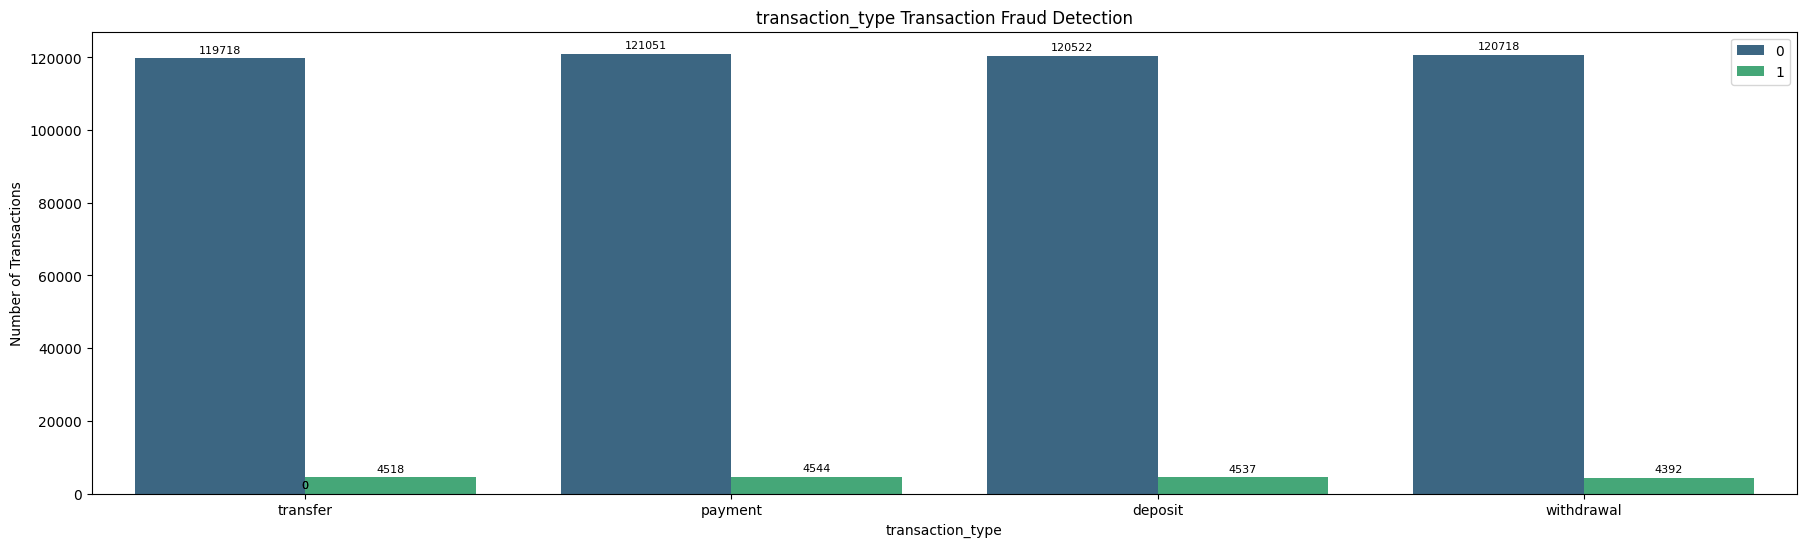

In [31]:
transaction_type_fraud_txn_visual = fraud_txn_chart("transaction_type")
transaction_type_fraud_txn_visual

### sender_account, receiver_account

In [32]:
# fraud analysis based on sender_account and receiver_account
sender_account =  df.groupby("sender_account").agg( total_txn = ("transaction_id","count"),
                                                   fraud_txn =  ("is_fraud" ,"sum"))
receiver_account =  df.groupby("receiver_account").agg( total_txn = ("transaction_id","count"),
                                                   fraud_txn =  ("is_fraud" ,"sum"))
account_txn  = pd.concat([sender_account,receiver_account],axis= 0).reset_index().rename(columns= {"index":"account_id"})
account_txn = account_txn.groupby("account_id").agg( total_txn = ("total_txn","sum"),
                                                   fraud_txn =  ("fraud_txn","sum")).sort_values(by="fraud_txn",ascending= False)
account_txn["fraud_rate"] = (account_txn["fraud_txn"]/account_txn["total_txn"])*10
account_txn = account_txn.sort_values("fraud_rate" ,ascending= False).head(10)
account_txn
                               

,total_txn,fraud_txn,fraud_rate
account_id,,,
ACC858409,1,1,10.0
ACC307958,1,1,10.0
ACC110072,1,1,10.0
ACC232108,1,1,10.0
ACC232095,1,1,10.0
ACC337697,1,1,10.0
ACC119070,1,1,10.0
ACC737402,1,1,10.0
ACC232092,1,1,10.0


C:\Users\SWAPNIL GAIKWAD\AppData\Local\Temp\ipykernel_31672\2062488345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=account_txn  ,x= "account_id" ,y= "fraud_rate",palette= "viridis")


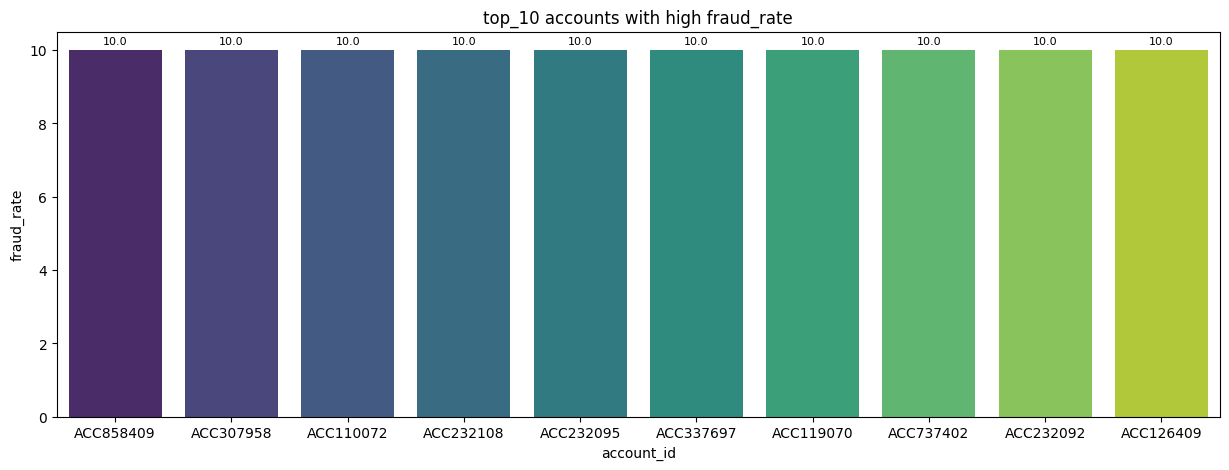

In [33]:
# top 10 accounts with high fraud_rate
plt.figure(figsize=(15,5))
ax = sns.barplot(data=account_txn  ,x= "account_id" ,y= "fraud_rate",palette= "viridis")
plt.title("top_10 accounts with high fraud_rate")
for p in ax.patches:
    ax.annotate(f'{round(float(p.get_height()),2)}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                fontsize=8, color='black',
                xytext=(0, 6),textcoords='offset points')
plt.show()

### merchant_category

In [34]:
# fruad analysis based on merchant_category
fraud_txn_merchan_cat = fraud_txn_data("merchant_category")
fraud_txn_merchan_cat

,total_txn,fraudulent_tx,fraud_rate
merchant_category,,,
entertainment,62729,2295,3.658595
utilities,62228,2271,3.649483
retail,62430,2275,3.644081
other,62504,2267,3.626968
restaurant,62470,2265,3.625740
grocery,62257,2207,3.544983
online,62506,2208,3.532461
travel,62876,2203,3.503722


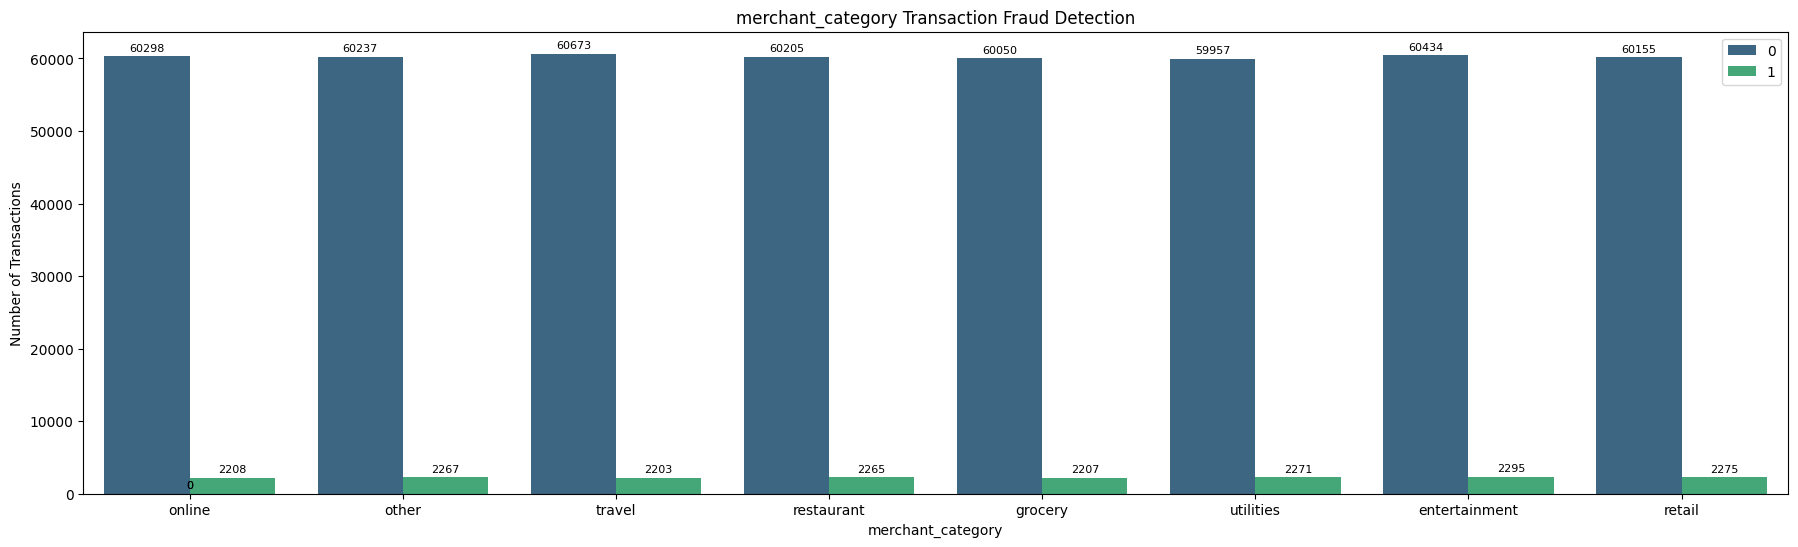

In [35]:
fraud_txn_merchan_cat_visual = fraud_txn_chart("merchant_category")
fraud_txn_merchan_cat_visual

### spending_deviation_score

In [36]:
# Understand normal vs. anomalous spending patterns.
fraud_txn_sds = fraud_txn_data("spending_deviation_score")
fraud_txn_sds

,total_txn,fraudulent_tx,fraud_rate
spending_deviation_score,,,
-4.06,1,1,100.000000
3.67,2,1,50.000000
-3.91,2,1,50.000000
3.69,3,1,33.333333
3.95,3,1,33.333333
-3.95,3,1,33.333333
-3.53,4,1,25.000000
-3.61,4,1,25.000000
-3.57,4,1,25.000000


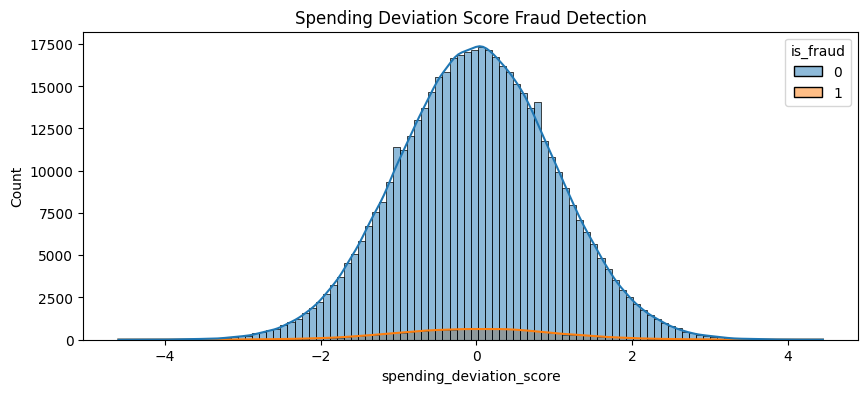

In [37]:
plt.figure(figsize=(10,4))
sns.histplot(data=df,x='spending_deviation_score',hue='is_fraud',bins=100,kde=True)
plt.title("Spending Deviation Score Fraud Detection")
plt.show()


### Velocity Score

In [38]:
# fruad analysis based on velocity_score
fraud_txn_vs = fraud_txn_data("velocity_score")
fraud_txn_vs

,total_txn,fraudulent_tx,fraud_rate
velocity_score,,,
12,24995,939,3.756751
1,24885,928,3.729154
19,25003,924,3.695557
17,25246,929,3.679791
9,25143,925,3.678956
15,25001,917,3.667853
16,24872,909,3.654712
18,25052,913,3.644420
13,25191,914,3.628280


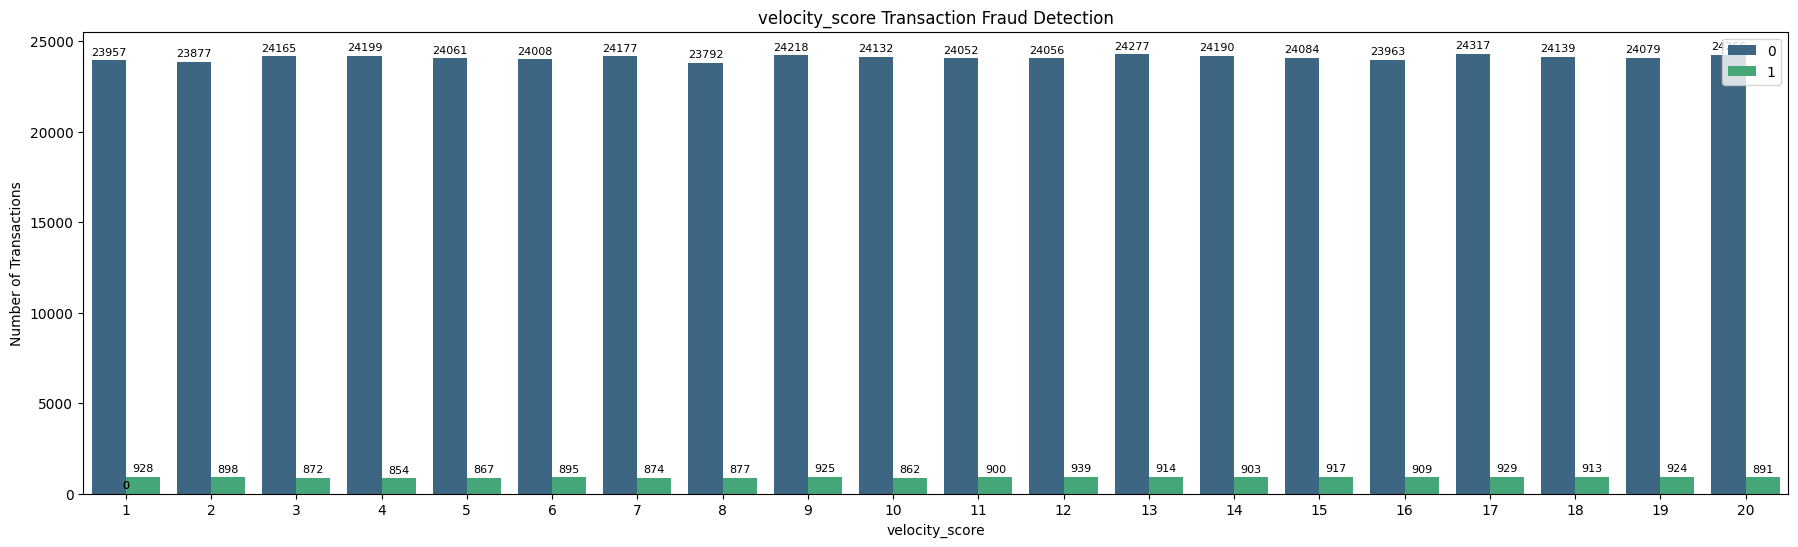

In [39]:
fraud_txn_vs_visual = fraud_txn_chart("velocity_score")
fraud_txn_vs_visual

### Geo Anomaly Score

In [40]:
# fruad analysis based on geo_anomaly_score
fraud_txn_geoanomaly_score = fraud_txn_data("geo_anomaly_score")
fraud_txn_geoanomaly_score

,total_txn,fraudulent_tx,fraud_rate
geo_anomaly_score,,,
0.00,2488,106,4.260450
0.07,4942,210,4.249292
0.30,4954,209,4.218813
0.81,5053,207,4.096576
0.77,5053,207,4.096576
0.61,5120,209,4.082031
1.00,2510,101,4.023904
0.64,4998,200,4.001601
0.74,4988,197,3.949479


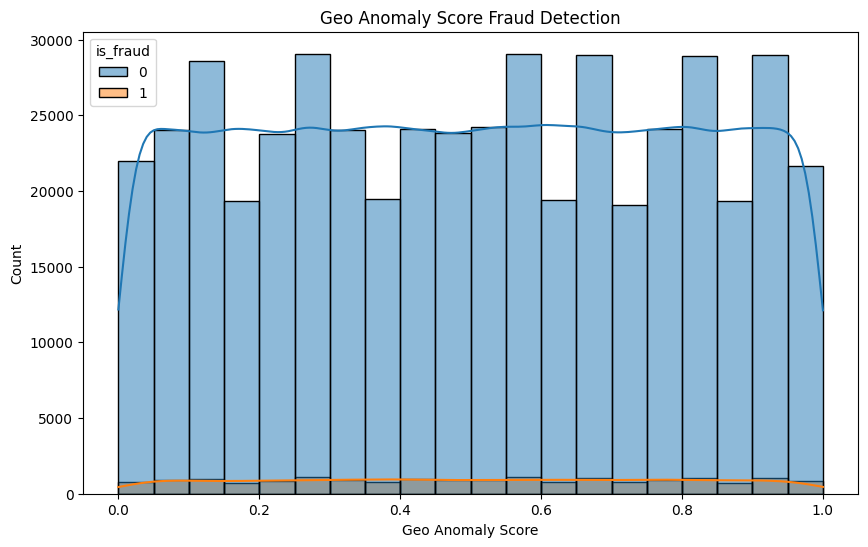

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='geo_anomaly_score',bins=20,hue='is_fraud',kde=True)
plt.title("Geo Anomaly Score Fraud Detection")
plt.xlabel("Geo Anomaly Score")
plt.ylabel("Count")
plt.show()

### IP Address

In [42]:
# fruad analysis based on ip_address
fraud_txn_ip_address = fraud_txn_data("ip_address")
fraud_txn_ip_address

,total_txn,fraudulent_tx,fraud_rate
ip_address,,,
173.98.149.216,1,1,100.0
104.99.8.6,1,1,100.0
72.86.71.13,1,1,100.0
170.195.48.141,1,1,100.0
125.116.180.9,1,1,100.0
170.195.55.16,1,1,100.0
104.98.174.35,1,1,100.0
221.191.48.5,1,1,100.0
200.97.173.231,1,1,100.0


### Location

In [43]:
# fruad analysis based on location
fraud_txn_location = fraud_txn_data("location")
fraud_txn_location

,total_txn,fraudulent_tx,fraud_rate
location,,,
London,62251,2361,3.792710
Singapore,62860,2290,3.643016
Berlin,62549,2253,3.601976
Tokyo,62311,2237,3.590056
Sydney,62592,2232,3.565951
Dubai,62592,2230,3.562756
Toronto,62516,2220,3.551091
New York,62329,2168,3.478317


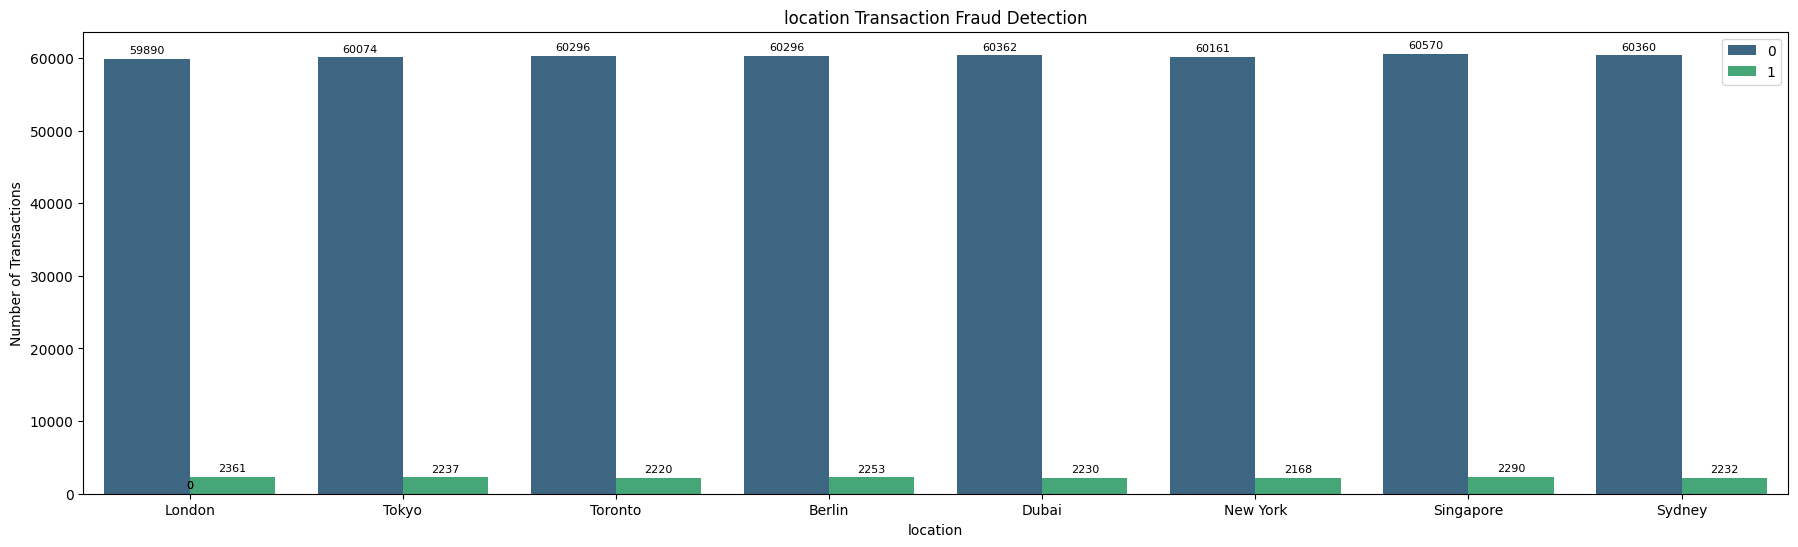

In [44]:
fraud_txn_loc_visual = fraud_txn_chart("location")
fraud_txn_loc_visual


### Payment Channel

In [45]:
# fruad analysis based on payment_channel
fraud_txn_payment_channel = fraud_txn_data("payment_channel")
fraud_txn_payment_channel

,total_txn,fraudulent_tx,fraud_rate
payment_channel,,,
card,125048,4535,3.626607
UPI,124642,4515,3.622374
wire_transfer,124958,4496,3.598009
ACH,125352,4445,3.546014


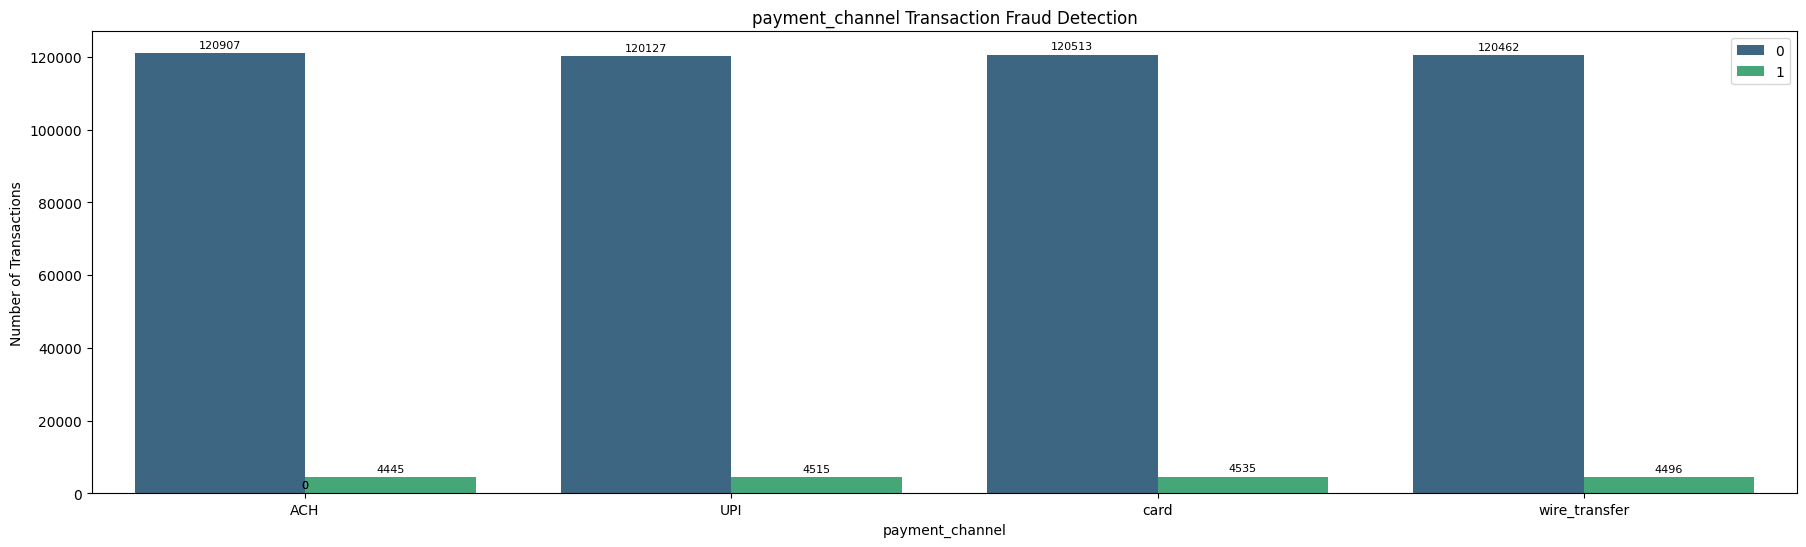

In [46]:
fraud_txn_payment_channel_visual = fraud_txn_chart("payment_channel")
fraud_txn_payment_channel_visual

### Device Hash

In [47]:
fraud_by_dh = (df.groupby("device_hash").agg(
    total_trans=('is_fraud','count'),
    fraud_trans=('is_fraud','sum')
))
fraud_by_dh['fraud_rate (%)'] = fraud_by_dh['fraud_trans']*100/fraud_by_dh['total_trans']
fraud_by_dh['fraud_rate (%)'] = fraud_by_dh['fraud_rate (%)'].round(2)
fraud_by_dh.sort_values('fraud_rate (%)',ascending=False).head(10)

,total_trans,fraud_trans,fraud_rate (%)
device_hash,,,
D9383722,1,1,100.0
D1282907,1,1,100.0
D9723027,1,1,100.0
D9723035,1,1,100.0
D2460527,1,1,100.0
D9441388,1,1,100.0
D3834501,1,1,100.0
D3130011,1,1,100.0
D3600580,1,1,100.0
